In [11]:
from pathlib import Path
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
fda_path = Path("/media/nvme1/pbecg-data/fda/2018/R^ECG^F_37^61_1152087555^015^_20180131115810_20180426194405.xml")
mort_path = Path("/media/nvme1/pbecg-data/mortara/")

fda_tree = ET.parse(fda_path)
fda_root = fda_tree.getroot()

mort_tree = ET.parse(mort_path)
mort_root = mort_tree.getroot()

FileNotFoundError: [Errno 2] No such file or directory: '/media/nvme1/pbecg-data/mortara/2023/R^ECG^M_37^61_6898824862^015^_20210127105144_20230415104747.xml'

In [3]:
namespaces = {"ns": "urn:hl7-org:v3"}

ecg_data = []

for component in fda_root.findall(".//ns:component", namespaces):
    sequence = component.find(".//ns:sequence", namespaces)
    if sequence is not None:
        code = sequence.find(".//ns:code", namespaces)
        lead_type = code.attrib.get("code")
        origin = sequence.find(".//ns:origin", namespaces)
        scale_element = sequence.find(".//ns:scale", namespaces)
        digits = sequence.find(".//ns:digits", namespaces)
        if digits is not None:
            signal = [int(value) for value in digits.text.strip().split()]
            scale = float(scale_element.attrib.get("value"))
            unit = scale_element.attrib.get("unit")
            ecg_data.append({"lead": lead_type, "signal": signal, "unit": unit, "scale": scale})

sig_df = pd.DataFrame(ecg_data)
sig_df

,lead,signal,unit,scale
0,MDC_ECG_LEAD_I,"[210, 280, 285, 300, 275, 280, 258, 250, 248, ...",uV,0.625
1,MDC_ECG_LEAD_II,"[325, 485, 480, 480, 460, 455, 443, 435, 413, ...",uV,0.625
2,MDC_ECG_LEAD_III,"[115, 205, 195, 180, 185, 175, 185, 185, 165, ...",uV,0.625
3,MDC_ECG_LEAD_aVR,"[-267, -382, -382, -390, -367, -367, -350, -34...",uV,0.625
4,MDC_ECG_LEAD_aVL,"[47, 37, 45, 60, 45, 52, 36, 32, 41, 47, 53, 5...",uV,0.625
5,MDC_ECG_LEAD_aVF,"[220, 345, 337, 330, 322, 315, 314, 310, 289, ...",uV,0.625
6,MDC_ECG_LEAD_V1,"[210, 210, 200, 180, 170, 150, 150, 140, 140, ...",uV,0.625
7,MDC_ECG_LEAD_V2,"[575, 720, 695, 680, 650, 630, 610, 590, 575, ...",uV,0.625
8,MDC_ECG_LEAD_V3,"[740, 1030, 1000, 990, 965, 930, 910, 880, 855...",uV,0.625
9,MDC_ECG_LEAD_V4,"[450, 800, 785, 780, 760, 740, 725, 710, 690, ...",uV,0.625


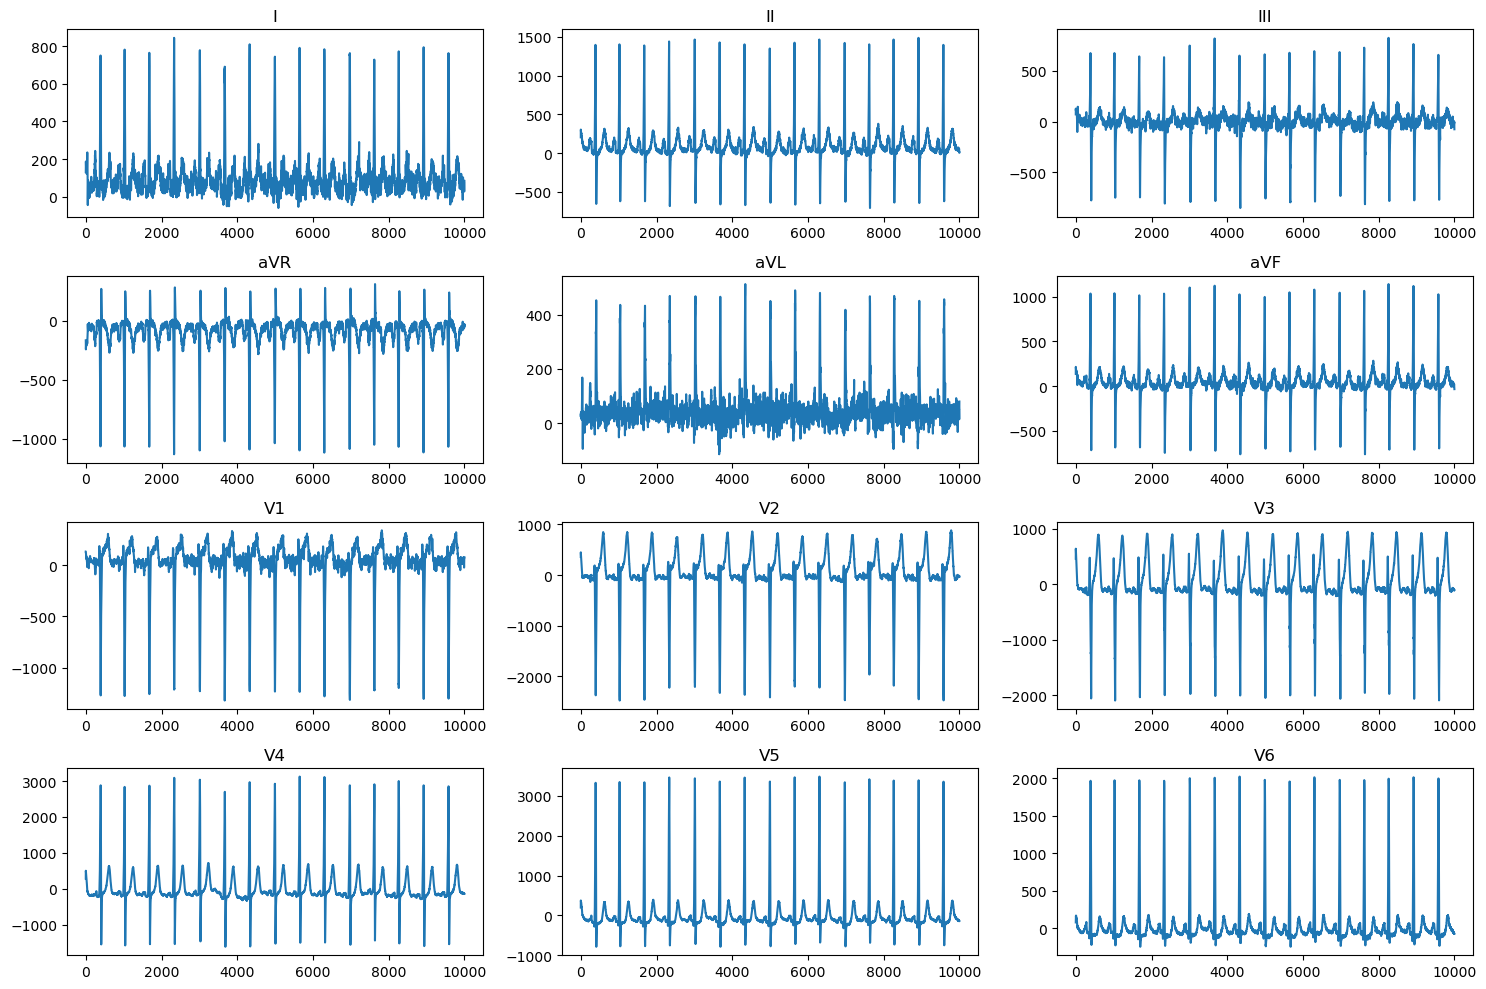

In [4]:
plot_df = sig_df.iloc[:12]

plt.figure(figsize=(15, 10))
for i, row in plot_df.iterrows():
    ax = plt.subplot(4, 3, i+1)
    scaled_signal = [x * row["scale"] for x in row["signal"]]
    ax.plot(scaled_signal)
    ax.set_title(row["lead"][13:])

plt.tight_layout()

In [5]:
demo_data = []
label_data = []

for demo_field in mort_root.findall(".//DEMOGRAPHIC_FIELD"):
    demo_info = {
        "ID": demo_field.get("ID", ""),
        "LABEL": demo_field.get("LABEL", ""),
        "VALUE": demo_field.get("VALUE", ""),
        "UNITS": demo_field.get("UNITS", "")
    }
    demo_data.append(demo_info)

# Extract STATEMENT Information
for statement in mort_root.findall('.//STATEMENT'):
    statement_info = {
        'STATEMENT_NUMBER': statement.get('STATEMENT_NUMBER', ''),
        'TEXT': statement.get('TEXT', ''),
        'REASON': statement.get('REASON', '')
    }
    label_data.append(statement_info)

demo_df = pd.DataFrame(demo_data)
label_df = pd.DataFrame(label_data)

label_df, demo_df

(   STATEMENT_NUMBER                                               TEXT REASON
 0                 1                                        8 EXCELLENT       
 1                 2                                         9 ABNORMAL       
 2                 3                                             10 YES       
 3                 4                                              14 NO       
 4                 5                                             17 YES       
 5                 6             18.3 LEFT VENTRICULAR HYPERTROPY (LVH)       
 6                 7                                              19 NO       
 7                 8                                          20 NORMAL       
 8                 9                                          23 ABSENT       
 9                10                                              24 NO       
 10               11                                  C MILDLY ABNORMAL       
 11               12                                

In [6]:
mort_path = Path("/media/nvme1/pbecg-data/mortara/")

statements = []
for file_path in mort_path.rglob("*.xml"):
    tree = ET.parse(file_path)
    root = tree.getroot()

    for statement in root.findall(".//STATEMENT"):
        statements.append(statement.get("TEXT", ""))

In [7]:
statements

['8 EXCELLENT',
 '9 NORMAL',
 'C NORMAL STUDY',
 '',
 'Reviewed By Jonathan Stiber, MD  5/28/2018 2:04:24 PM',
 '8 EXCELLENT',
 '9 ABNORMAL',
 '10 NO',
 '11.16 SINUS BRADYCARDIA',
 '14 YES',
 '15.01 1ST DEGREE AV BLOCK',
 '15.08 LEFT ANTERIOR FASCICULAR BLOCK',
 '15.11 RIGHT BUNDLE BRANCH BLOCK (RBBB)',
 '17 NO',
 '19 NO',
 '20 NORMAL',
 '23 ABSENT',
 '24 NO',
 'C POTENTIALLY SIGNIFICANT ECG FINDING - CLINICAL CORRELATION REQ',
 '',
 'Reviewed By Jonathan Stiber, MD  5/28/2018 7:20:11 PM',
 '8 EXCELLENT',
 '9 ABNORMAL',
 '10 NO',
 '11.15 NORMAL SINUS RHYTHM + OTHER RHYTHM/BEATS',
 '11.07 ATRIAL PREMATURE COMPLEXES',
 '14 NO',
 '17 YES',
 '18.1 LEFT ATRIAL ABNORMALITY (LAA)',
 '19 NO',
 '20 NORMAL',
 '23 ABSENT',
 '24 NO',
 'C MILDLY ABNORMAL',
 '',
 'Reviewed By Jonathan Stiber, MD  5/8/2018 9:02:35 PM',
 '8 EXCELLENT',
 '9 ABNORMAL',
 '10 YES',
 '14 YES',
 '15.01 1ST DEGREE AV BLOCK',
 '17 NO',
 '19 NO',
 '20 NORMAL',
 '23 ABSENT',
 '24 NO',
 'C MILDLY ABNORMAL',
 '',
 'Reviewed By Jo

In [8]:
fda_path = Path("/media/nvme1/pbecg-data/fda")

fda_patient_ids = []
for file_path in fda_path.rglob("*.xml"):
    patient_id = file_path.name.split("^")[3].split("_")[1]
    fda_patient_ids.append(patient_id)

print(f"Number of files: {len(fda_patient_ids)}")
print(f"Number of unique patients: {len(set(fda_patient_ids))}")

Number of files: 3268
Number of unique patients: 2383


In [9]:
mort_patient_ids = []
for file_path in mort_path.rglob("*.xml"):
    patient_id = file_path.name.split("^")[3].split("_")[1]
    mort_patient_ids.append(patient_id)

print(f"Number of files: {len(mort_patient_ids)}")
print(f"Number of unique patients: {len(set(mort_patient_ids))}")

Number of files: 4222
Number of unique patients: 2477


In [10]:
overlap = set(mort_patient_ids) & set(fda_patient_ids)
unique_patients = set(mort_patient_ids + fda_patient_ids)
print(f"Number of patients with full data: {len(overlap)}")
print(f"Number of unique patients: {len(unique_patients)}")

Number of patients with full data: 2373
Number of unique patients: 2487
